## Imports

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import spacy
import locationtagger

In [98]:
nltk.downloader.download('maxent_ne_chunker')
nltk.downloader.download('words')
nltk.downloader.download('treebank')
nltk.downloader.download('maxent_treebank_pos_tagger')
nltk.downloader.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\s164386\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\s164386\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package treebank to
[nltk_data]     C:\Users\s164386\AppData\Roaming\nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     C:\Users\s164386\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_treebank_pos_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\s164386\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\s164386\AppData\Roaming\nltk_data...
[nltk_data]   P

True

## Preprocessing

In [162]:
url1 = 'http://en.wikipedia.org/wiki/List_of_works_by_Vincent_van_Gogh'
tables = pd.read_html(url1)
phases = tables[1:7]

In [3]:
for i, ph in enumerate(phases):
    phases[i] = ph.drop(['#', 'Image', 'Medium,Dimensions', 'Catalogue No.'], axis=1)

In [4]:
for i in phases:
    print(i.shape)

(34, 4)
(201, 4)
(227, 4)
(187, 4)
(142, 4)
(77, 4)


In [5]:
vgph = pd.concat(phases)
vgph.index = range(len(vgph))
vgph_csv = vgph.to_csv(r'C:\Users\s164386\VolVis\epds\life_in_color\vgph.csv', index = False)
print(vgph.shape)

(868, 4)


In [6]:
# offline
#vgph1 = pd.read_csv(r'C:\Users\s164386\VolVis\epds\life_in_color\vgph.csv')

In [49]:
vgph1 = vgph.copy()

In [163]:
vgph1.iloc[555]

Title                             Interior of the Restaurant in Arles
Date                                                      August 1888
Current location                                   Private collection
Created in                                                      Arles
Year                                                             1888
Month                                                          August
Month_Map                                                      August
Season                                                         Summer
Place               <locationtagger.locationextractor.LocationExtr...
Place_Name                                                           
Ownership                                                     Private
Name: 555, dtype: object

## Dates, Seasons

In [136]:
vgph1['Year'] = vgph1['Date']
vgph1['Year'] = vgph1['Year'].str.replace(r'\D', '')
vgph1['Month'] = vgph1['Date']
vgph1['Month'] = vgph1['Month'].str.replace(r'\d+', '')
vgph1['Month'] = vgph1['Month'].str.replace('\W+','')
#vgph1['Strip'] = vgph1['Year'].map(str).apply(len)
vgph1['Year'] = vgph1['Year'].map(str).apply(lambda val: val[:4] if val[:2]=='18' else val[-4:])

C:\Users\s164386\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
C:\Users\s164386\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
C:\Users\s164386\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


[Text(0, 0, '1881'),
 Text(1, 0, '1882'),
 Text(2, 0, '1883'),
 Text(3, 0, '1884'),
 Text(4, 0, '1885'),
 Text(5, 0, '1886'),
 Text(6, 0, '1887'),
 Text(7, 0, '1888'),
 Text(8, 0, '1889'),
 Text(9, 0, '1890')]

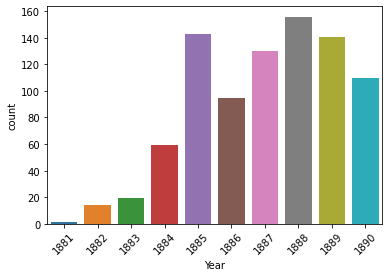

In [137]:
ax = sns.countplot(x='Year', data=vgph1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

In [138]:
months_mapping = ['January', 'February', 'March',
         'April', 'May', 'June', 'July',
         'August', 'September', 'October',
         'November', 'December', 'Spring',
         'Summer', 'Autumn', 'Winter']
month_pattern = '|'.join(months_mapping)

In [139]:
def seasonal_search(search_str:str, search_list:str):
    search_obj = re.search(search_list, search_str)
    if search_obj:
        return_str = search_str[search_obj.start():search_obj.end()]
    else: 
        return_str = ''
    return return_str

In [140]:
def season_map(month):
    if month == 'March' or month == 'April' or month == 'May':
        return 'Spring'
    if month == 'June' or month == 'July' or month == 'August':
        return 'Summer'
    if month == 'September' or month == 'October' or month == 'November':
        return 'Autumn'
    if month == 'December' or month == 'January' or month == 'February': 
        return 'Winter'

In [144]:
vgph1['Month_Map'] = vgph1['Month'].apply(lambda x: seasonal_search(search_str=x, search_list=month_pattern))
vgph1['Season'] = vgph1['Month_Map'].apply(lambda x: season_map(x))
vgph1

,Title,Date,Current location,Created in,Year,Month,Month_Map,Season,Place,Place_Name,Private
0,Still Life with Cabbage and Clogs,November-December 1881,"Van Gogh Museum, Amsterdam",The Hague,1881,NovemberDecember,November,Autumn,<locationtagger.locationextractor.LocationExtr...,"'Amsterdam', ''",
1,Beach at Scheveningen in Calm Weather,August 1882,"Minnesota Maritime Art Museum, Winona",The Hague,1882,August,August,Summer,<locationtagger.locationextractor.LocationExtr...,'Winona',
2,Dunes,August 1882,Private collection,The Hague,1882,August,August,Summer,<locationtagger.locationextractor.LocationExtr...,,Private
3,Women Mending Nets in the Dunes,August 1882,Private collection,The Hague,1882,August,August,Summer,<locationtagger.locationextractor.LocationExtr...,,Private
4,"A Girl in the Street, Two Coaches in the Backg...",August 1882,"Villa Flora, Winterthur",The Hague,1882,August,August,Summer,<locationtagger.locationextractor.LocationExtr...,"'Villa', 'Flora', 'Winterthur'",
...,...,...,...,...,...,...,...,...,...,...,...
863,The Fields,July 1890,Private collection,Auvers-sur-Oise,1890,July,July,Summer,<locationtagger.locationextractor.LocationExtr...,,Private
864,Haystacks under a Rainy Sky,July 1890,"Kröller-Müller Museum, Otterlo",Auvers-sur-Oise,1890,July,July,Summer,<locationtagger.locationextractor.LocationExtr...,'Otterlo',
865,View of Auvers with Church,July 1890,"Rhode Island School of Design Museum, Providence",Auvers-sur-Oise,1890,July,July,Summer,<locationtagger.locationextractor.LocationExtr...,'Providence',
866,Wheat Fields with Auvers in the Background,July 1890,Private collection,Auvers-sur-Oise,1890,July,July,Summer,<locationtagger.locationextractor.LocationExtr...,,Private


[Text(0, 0, 'Autumn'),
 Text(1, 0, 'Summer'),
 Text(2, 0, 'Spring'),
 Text(3, 0, 'Winter')]

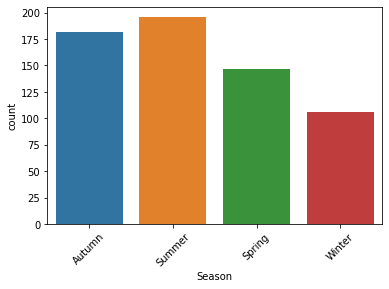

In [146]:
ax = sns.countplot(x='Season', data=vgph1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

## Locations

[Text(0, 0, 'The Hague'),
 Text(1, 0, 'Scheveningen'),
 Text(2, 0, 'Nieuw-Amsterdam'),
 Text(3, 0, 'Drenthe'),
 Text(4, 0, 'Nuenen'),
 Text(5, 0, 'Amsterdam'),
 Text(6, 0, 'Antwerp'),
 Text(7, 0, 'Paris'),
 Text(8, 0, 'Arles'),
 Text(9, 0, 'Saint-Rémy'),
 Text(10, 0, 'Auvers-sur-Oise')]

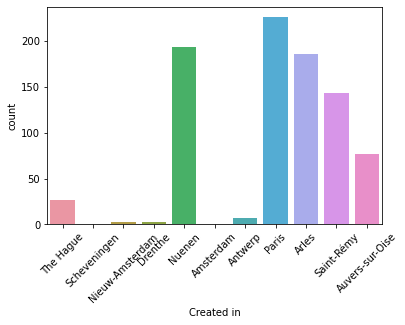

In [147]:
ax = sns.countplot(x='Created in', data=vgph1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

[Text(0, 0, 'Van Gogh Museum, Amsterdam'),
 Text(1, 0, 'Minnesota Maritime Art Museum, Winona'),
 Text(2, 0, 'Private collection'),
 Text(3, 0, 'Villa Flora, Winterthur'),
 Text(4, 0, 'Kröller-Müller Museum, Otterlo'),
 Text(5, 0, 'Kuboso Memorial Museum of Arts, Izumi'),
 Text(6, 0, 'National Gallery of Art, Washington D.C.'),
 Text(7, 0, 'Unknown'),
 Text(8, 0, 'Unknown (stolen)'),
 Text(9, 0, 'Centraal Museum, Utrecht'),
 Text(10, 0, 'Museum of John Paul II Collection, Warsaw'),
 Text(11, 0, 'Drents Museum, Assen'),
 Text(12, 0, 'Drents Museum, Assen and Van Gogh Museum, Amsterdam'),
 Text(13, 0, 'Private Collection'),
 Text(14, 0, 'Museum of Fine Arts, Boston'),
 Text(15, 0, 'Groninger Museum, Groningen (Stolen, March 2020)'),
 Text(16, 0, "Noordbrabants Museum, 's-Hertogenbosch"),
 Text(17, 0, 'Foundation E.G. Bührle, Zürich'),
 Text(18, 0, 'Neue Pinakothek, Munich'),
 Text(19, 0, 'Museum Boijmans Van Beuningen, Rotterdam'),
 Text(20, 0, 'Portland Art Museum, Portland'),
 Text(21,

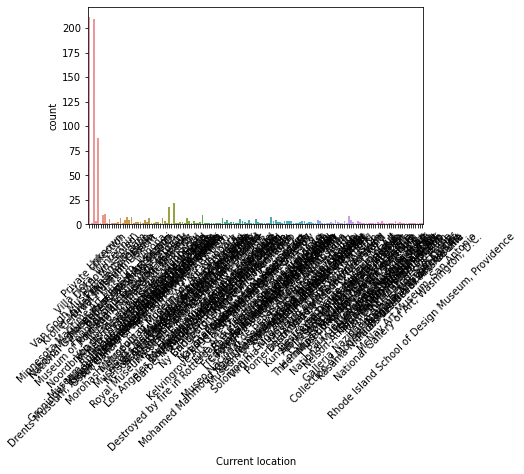

In [148]:
ax = sns.countplot(x='Current location', data=vgph1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

In [149]:
# trial for direct application of library
# vgph_trial = vgph1.head().copy()
# vgph_trial['Trial'] = vgph1['Current location'].apply(lambda x: locationtagger.find_locations(text = x).cities)
# vgph_trial

In [70]:
vgph1['Place'] = vgph1['Current location'].apply(lambda x: locationtagger.find_locations(text = x))

In [118]:
vgph1['Place'] = vgph1['Current location'].apply(lambda x: locationtagger.find_locations(text = x))
vgph1['Place_Name'] = vgph1['Place'].apply(lambda x: x.cities)

In [120]:
vgph1['Place_Name'] = vgph1['Place_Name'].astype(str)
vgph1['Place_Name'] = vgph1['Place_Name'].str.replace('[','')
vgph1['Place_Name'] = vgph1['Place_Name'].str.replace(']','')
vgph1['Place_Name'] = vgph1['Place_Name'].str.replace('Van','')

C:\Users\s164386\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  
C:\Users\s164386\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


[Text(0, 0, "'Amsterdam', ''"),
 Text(1, 0, "'Winona'"),
 Text(2, 0, ''),
 Text(3, 0, "'Villa', 'Flora', 'Winterthur'"),
 Text(4, 0, "'Otterlo'"),
 Text(5, 0, "'Izumi'"),
 Text(6, 0, "'Washington'"),
 Text(7, 0, "'Utrecht'"),
 Text(8, 0, "'Warsaw'"),
 Text(9, 0, "'Assen'"),
 Text(10, 0, "'Amsterdam', 'Assen'"),
 Text(11, 0, "'Boston'"),
 Text(12, 0, "'March'"),
 Text(13, 0, "'Munich'"),
 Text(14, 0, "'Rotterdam'"),
 Text(15, 0, "'Portland'"),
 Text(16, 0, "'Amsterdam'"),
 Text(17, 0, "'Wuppertal'"),
 Text(18, 0, "'Mexico City'"),
 Text(19, 0, "'Madrid'"),
 Text(20, 0, "'Hague'"),
 Text(21, 0, "'Vienna'"),
 Text(22, 0, "'Pasadena', 'Norton'"),
 Text(23, 0, "'Sydney'"),
 Text(24, 0, "'St. Louis'"),
 Text(25, 0, "'Cincinnati'"),
 Text(26, 0, "'London'"),
 Text(27, 0, "'Los Angeles'"),
 Text(28, 0, "'Haifa'"),
 Text(29, 0, "'New York', 'Metropolitan'"),
 Text(30, 0, "'La Chaux-de-Fonds', 'Muse'"),
 Text(31, 0, "'Paris', 'Muse'"),
 Text(32, 0, "'Hatsukaichi'"),
 Text(33, 0, "'Brussels', 'Ro

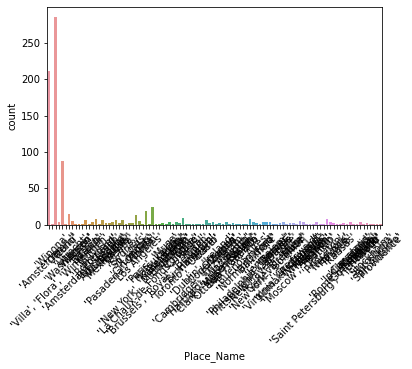

In [121]:
ax = sns.countplot(x='Place_Name', data=vgph1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

In [156]:
vgph1 = vgph1.drop(['Private'], axis=1)

In [157]:
owner_pattern = ['Private', 'Private Collection', 'Private Collections',
                    'Unknown', 'Stolen', 'Location']
ownership_pattern = '|'.join(owner_pattern)

In [158]:
def ownership_search(search_str:str, search_list:str):
    search_obj = re.search(search_list, search_str)
    if search_obj:
        return_str = search_str[search_obj.start():search_obj.end()]
    else: 
        return_str = ''
    return return_str

In [159]:
vgph1['Ownership'] = vgph1['Current location'].apply(lambda x: ownership_search(search_str=x, search_list=ownership_pattern))

[Text(0, 0, ''),
 Text(1, 0, 'Private'),
 Text(2, 0, 'Unknown'),
 Text(3, 0, 'Stolen')]

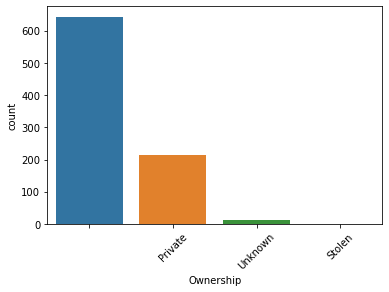

In [160]:
ax = sns.countplot(x='Ownership', data=vgph1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

## Images